# Testing cluster algorithms

In [1]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns
import matplotlib as plt

from visualization import *
#from graphtools import *
from clustertools import *
#from chameleon import *

In [2]:
df_base = pd.read_csv('./datasets/Aggregation.csv', sep=' ', header=None)

In [3]:
df_base.columns = ['x', 'y']

### First data visualization 

Text(0.5, 1.0, 'Scatter Plot')

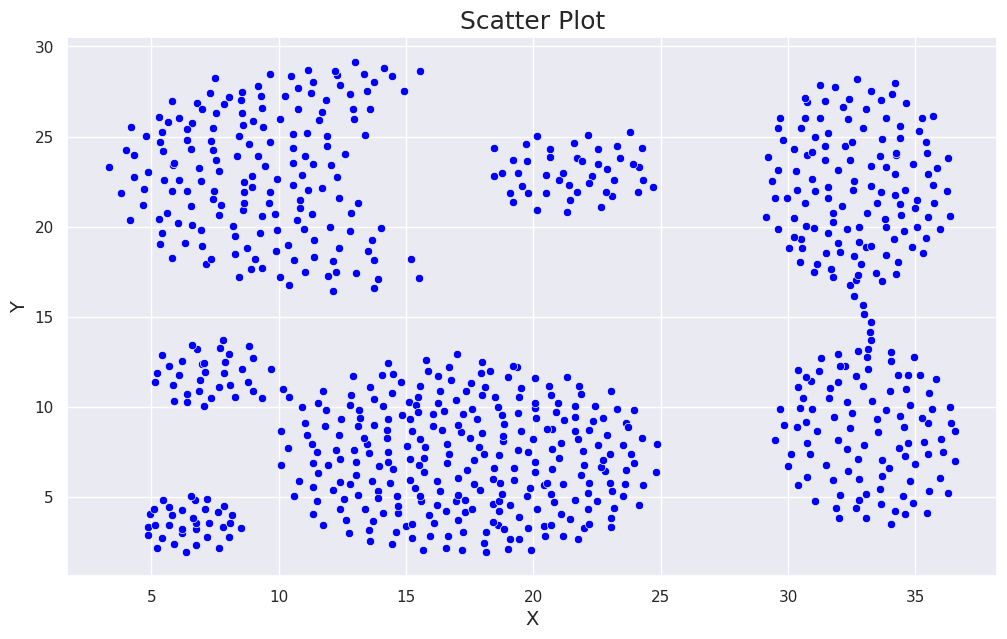

In [4]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
ax = sns.scatterplot(data=df_base, x='x', y='y', color='blue')
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Scatter Plot', fontsize = 18)

### Test KMeans

In [5]:
# Create feature matrix
X = df_base.values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(X)

In [7]:
KMeans_df = df_base.copy()
KMeans_df['label'] = labels
#KMeans_df.to_csv('./dfKMeanslabels.csv', index=False)

Text(0.5, 1.0, 'KMeans Clustring')

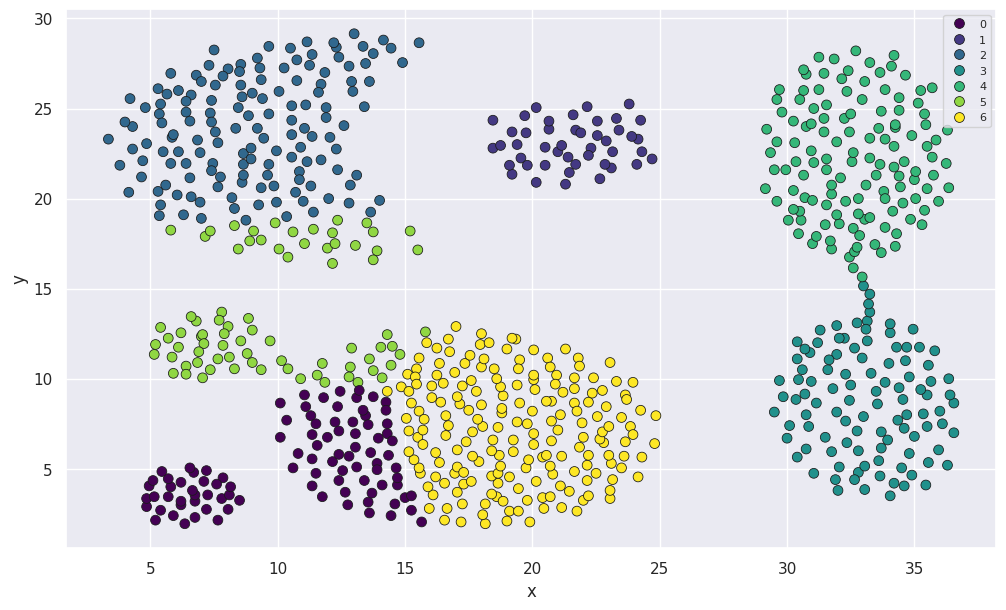

In [8]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=KMeans_df, x='x', y='y', hue=labels, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

### Correct clustering

In [9]:
KMeans_df = df_base.copy()

In [11]:
df134 = KMeans_df.copy()
df134 = KMeans_df[~KMeans_df['label'].isin([0,2,5,6])]

Text(0.5, 1.0, 'KMeans Clustring')

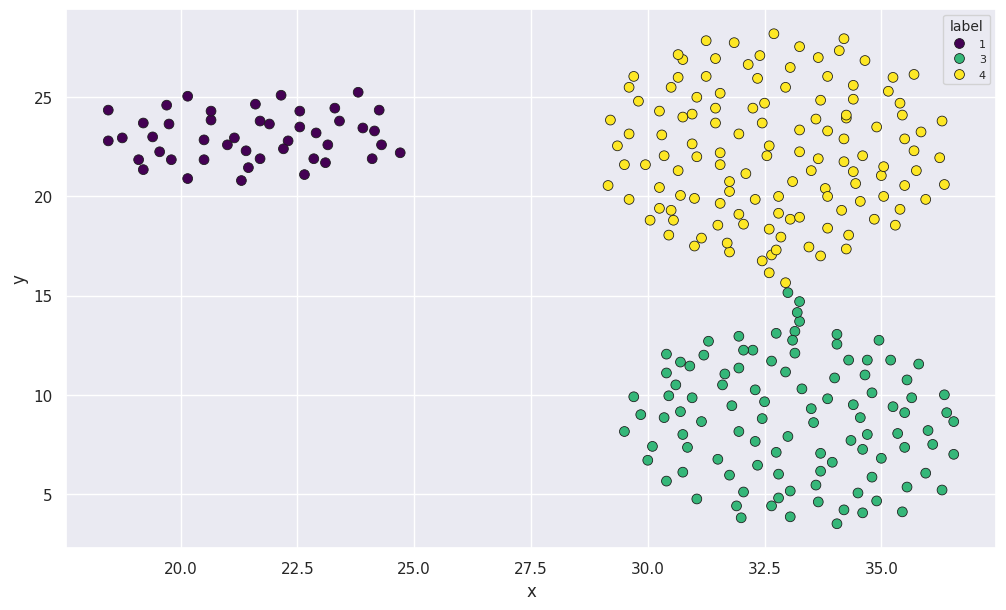

In [12]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df134, x='x', y='y', hue=df134.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

In [14]:
df_filtered = KMeans_df[~KMeans_df['label'].isin([1, 3, 4])]

Text(0.5, 1.0, 'KMeans Clustring')

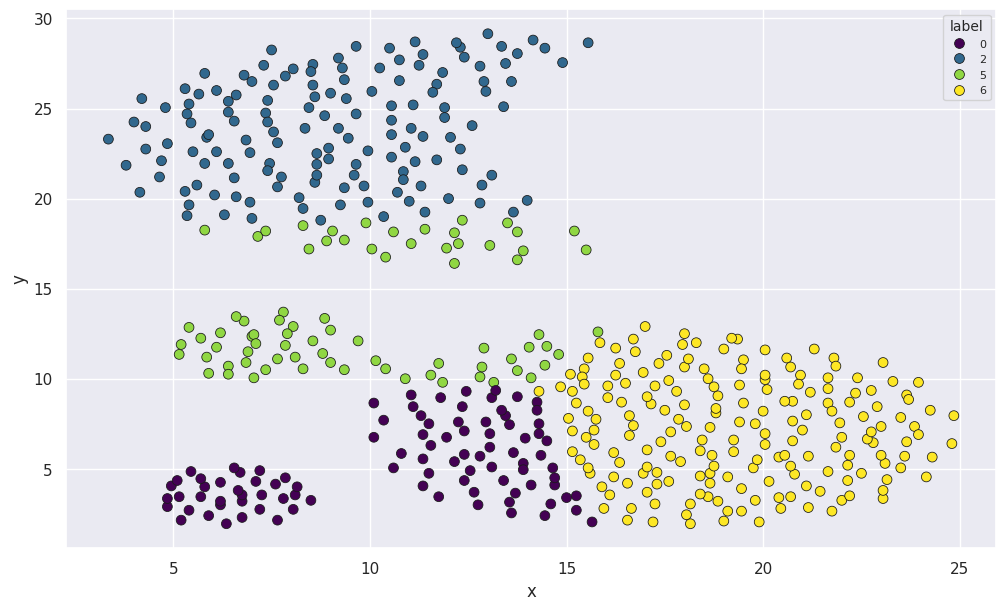

In [15]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_filtered, x='x', y='y', hue=df_filtered.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('KMeans Clustring', fontsize = 18)

In [24]:
df_filtered.loc[df_filtered['y']>15, 'label'] = 2
df_filtered.loc[(df_filtered['label']==0) & (df_filtered['x']>9), 'label']=6
df_filtered.loc[(df_filtered['label']==5) & (df_filtered['x']>10), 'label']=6

Text(0.5, 1.0, 'Chameleon Clustering')

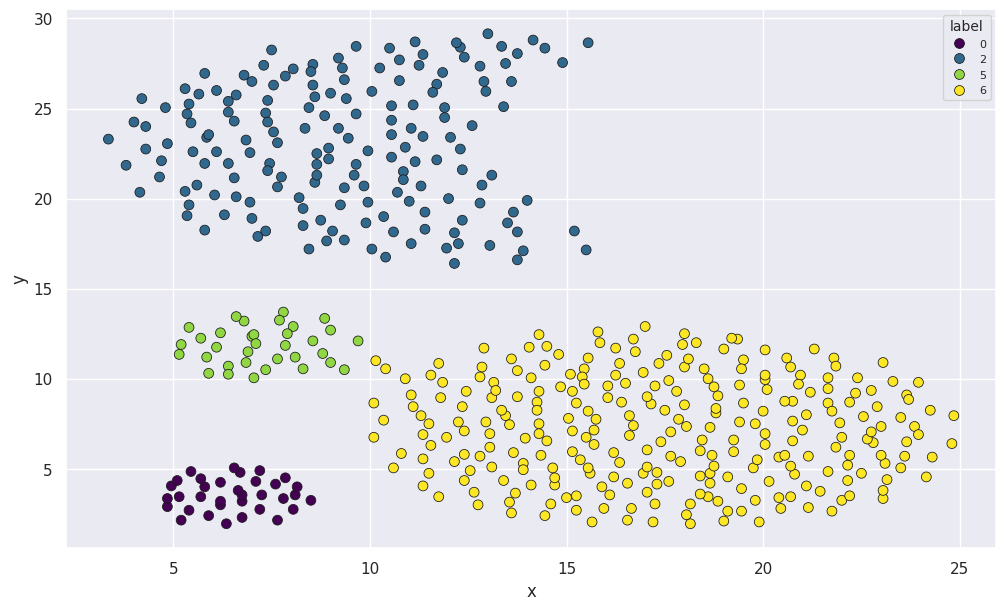

In [25]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_filtered, x='x', y='y', hue=df_filtered.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Chameleon Clustering', fontsize = 18)

In [26]:
df_complete = pd.concat([df_filtered, df134], axis=0)
df_complete.reset_index(drop=True, inplace=True)

print(df_complete.head())

       x      y  label  labels
0  15.55  28.65      2     2.0
1  14.90  27.55      2     2.0
2  14.45  28.35      2     2.0
3  14.15  28.80      2     2.0
4  13.75  28.05      2     2.0


Text(0.5, 1.0, 'Chameleon Clustering')

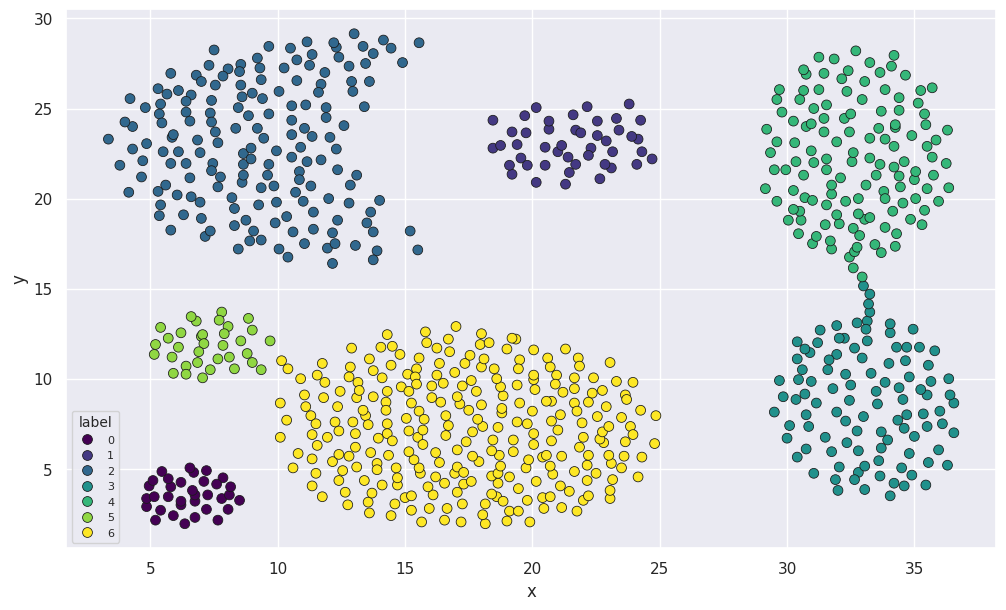

In [27]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})
sns.scatterplot(data=df_complete, x='x', y='y', hue=df_complete.label, palette='viridis', edgecolor='k', s=50)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_title('Chameleon Clustering', fontsize = 18)

## Testing DBSCAN